In [5]:
# based on https://ipython-books.github.io/85-using-support-vector-machines-for-classification-tasks/

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.svm as svm
import matplotlib.pyplot as plt
%matplotlib inline

### Generate some data

In [2]:
X = np.random.randn(200, 2)
y = X[:, 0] + X[:, 1] > 1

### We train the classifier.

In [4]:
%%time
est = svm.LinearSVC()
est.fit(X, y)

CPU times: user 2.01 ms, sys: 1.19 ms, total: 3.2 ms
Wall time: 1.73 ms


### Visualize
We define a function that displays the boundaries and decision function of a trained classifier:

In [6]:
# We generate a grid in the square [-3,3 ]^2.
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

In [7]:
def plot_decision_function(est, title):
    # We evaluate the decision function on the grid.
    Z = est.decision_function(np.c_[xx.ravel(),
                                    yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap = plt.cm.Blues

    # We display the decision function on the grid.
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.imshow(Z,
              extent=(xx.min(), xx.max(),
                      yy.min(), yy.max()),
              aspect='auto',
              origin='lower',
              cmap=cmap)

    # We display the boundaries.
    ax.contour(xx, yy, Z, levels=[0],
               linewidths=2,
               colors='k')

    # We display the points with their true labels.
    ax.scatter(X[:, 0], X[:, 1],
               s=50, c=.5 + .5 * y,
               edgecolors='k',
               lw=1, cmap=cmap,
               vmin=0, vmax=1)
    ax.axhline(0, color='k', ls='--')
    ax.axvline(0, color='k', ls='--')
    ax.axis([-3, 3, -3, 3])
    ax.set_axis_off()
    ax.set_title(title)

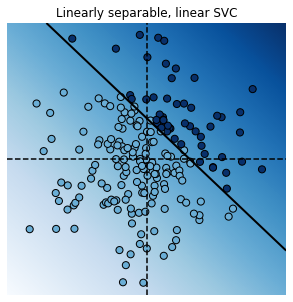

In [8]:
ax = plot_decision_function(
    est, "Linearly separable, linear SVC")

The linear SVC tried to separate the points with a line and it did a pretty good job here.

We now modify the labels with a XOR function. A point's label is 1 if the coordinates have different signs. This classification is not linearly separable. Therefore, a linear SVC fails completely

/home/kuba/.virtualenvs/main/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kuba/.virtualenvs/main/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kuba/.virtualenvs/main/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kuba/.virtualenvs/main/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kuba/.virtualenvs/main/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to c

/home/kuba/.virtualenvs/main/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kuba/.virtualenvs/main/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kuba/.virtualenvs/main/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kuba/.virtualenvs/main/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kuba/.virtualenvs/main/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to c

/home/kuba/.virtualenvs/main/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kuba/.virtualenvs/main/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kuba/.virtualenvs/main/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kuba/.virtualenvs/main/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kuba/.virtualenvs/main/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to c

Score: 0.6


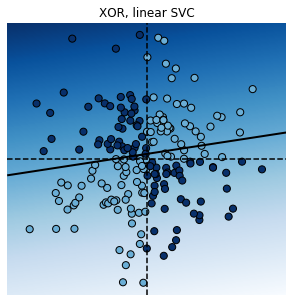

In [9]:
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# We train the classifier.
est = ms.GridSearchCV(svm.LinearSVC(),
                      {'C': np.logspace(-3., 3., 10)})
est.fit(X, y)
print("Score: {0:.1f}".format(
      ms.cross_val_score(est, X, y).mean()))

# We plot the decision function.
ax = plot_decision_function(
    est, "XOR, linear SVC")

### nonlinear kernels...

Kernels specify a nonlinear transformation of the points into a higher dimensional space. Transformed points in this space are assumed to be more linearly separable.

Score: 0.905


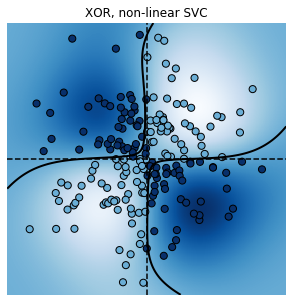

In [10]:
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

est = ms.GridSearchCV(
    svm.SVC(), {'C': np.logspace(-3., 3., 10),
                'gamma': np.logspace(-3., 3., 10)})
est.fit(X, y)
print("Score: {0:.3f}".format(
      ms.cross_val_score(est, X, y).mean()))

plot_decision_function(
    est.best_estimator_, "XOR, non-linear SVC")